In [1]:
%autosave 0
from sklearnMaster import voter

from sklearn.model_selection import train_test_split
from pandas import read_csv
import numpy as np
from joblib import dump, load

Autosave disabled


# Example Regressor with dataset from House prices

In [2]:
df = read_csv("new_Basetrain.csv", index_col =0)

y_trainfull = df.SalePriceLog.values.reshape((1453,))
x_trainfull = df.drop(['target','SalePriceLog'], axis=1)

seed = 42
np.random.seed(seed)

x_train, x_val, y_train, y_val = train_test_split(x_trainfull,y_trainfull , test_size=0.3, random_state=seed)

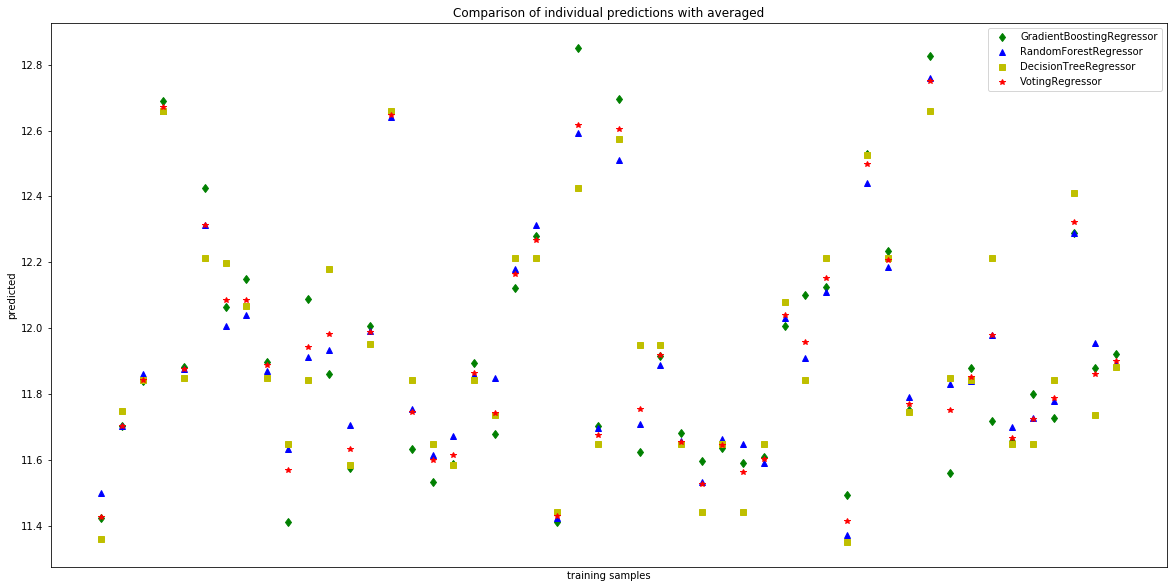

Model Voting
RMSE on val =  0.1388
MAPE on val =  0.09925117463812806

Model GradientBoostingRegressor
RMSE on val =  0.1234
MAPE on val =  0.08330326851697306

Model RandomForestRegressor
RMSE on val =  0.1419
MAPE on val =  0.09986805611443339

Model DecisionTreeRegressor
RMSE on val =  0.1859
MAPE on val =  0.1390835509233468



VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='mae',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                             

In [3]:
voter("regressor",x_train,x_val,y_train,y_val).get_model()

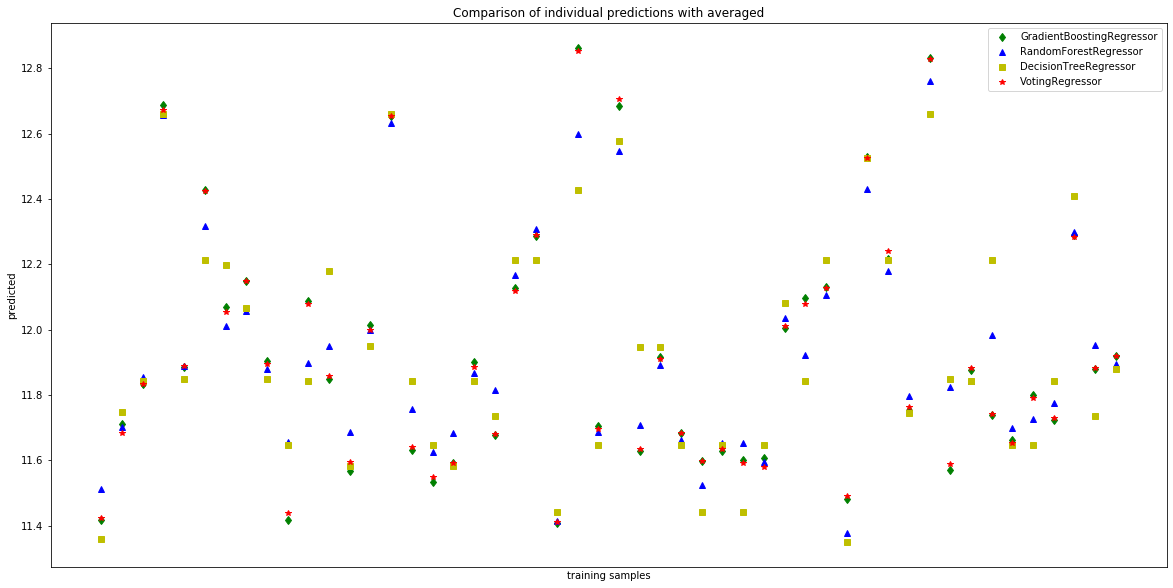

Model Voting
RMSE on val =  0.1263
MAPE on val =  0.08409846775289231

Model GradientBoostingRegressor
RMSE on val =  0.1255
MAPE on val =  0.08446978945098334

Model RandomForestRegressor
RMSE on val =  0.1423
MAPE on val =  0.09974684556865929

Model DecisionTreeRegressor
RMSE on val =  0.1851
MAPE on val =  0.1382500302182231



VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='mae',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                             

In [4]:
weights = [20,1,0]
voter("regressor",x_train,x_val,y_train,y_val,weights).get_model()

# Example  Classifier with dataset GMSC

In [5]:
df_c = read_csv("gmctv3.csv", index_col =0)

In [6]:
y_trainfull_c = df_c["target"]
x_trainfull_c = df_c.drop(['target'], axis=1)

seed = 42
np.random.seed(seed)

x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(x_trainfull_c,y_trainfull_c , test_size=0.3, random_state=seed)

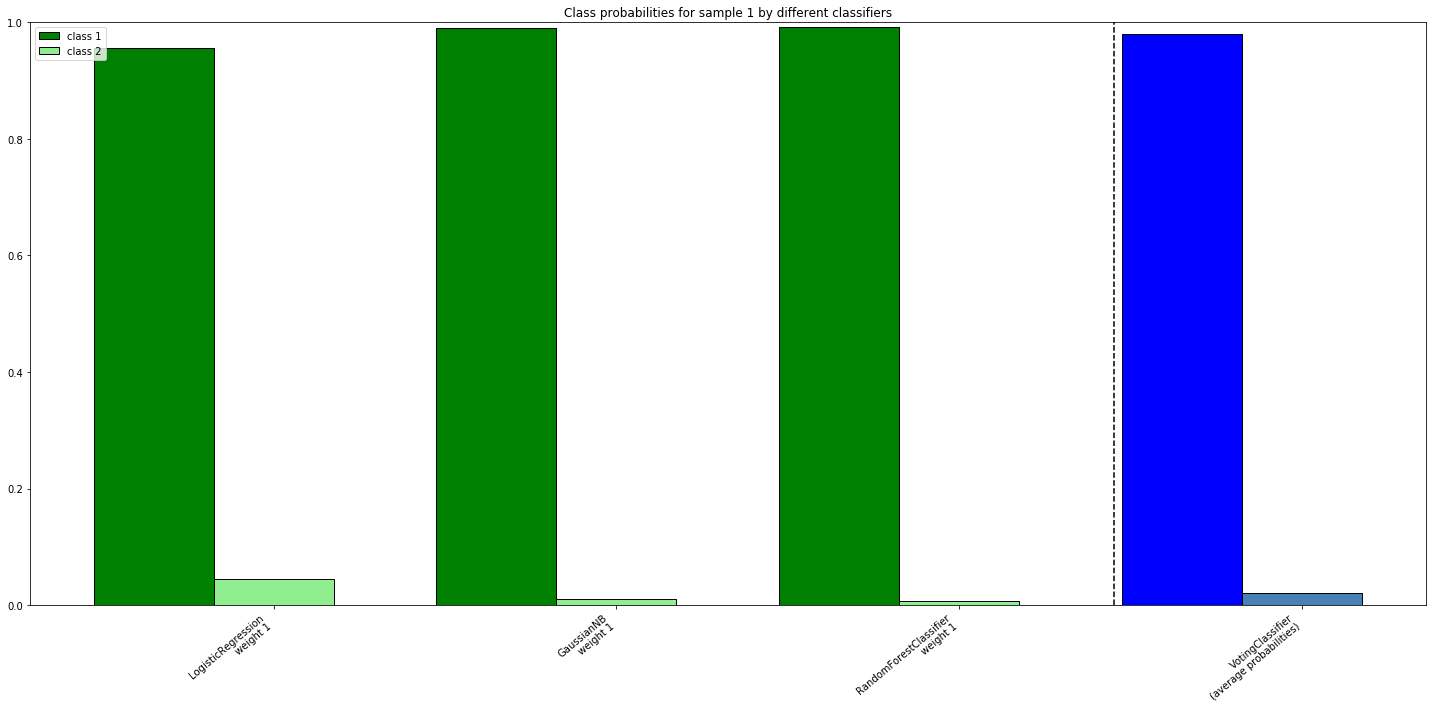

Model VotingClassifier
Accuracy =  0.934

Model LogisticRegression
Accuracy =  0.9339

Model GaussianNB
Accuracy =  0.9336

Model RandomForestClassifier
Accuracy =  0.9365



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=3000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                              

In [7]:
voter("classifier",x_train_c,x_val_c,y_train_c,y_val_c).get_model()

In [8]:
weights = [0,0,20]
voter("classifier",x_train_c,x_val_c,y_train_c,y_val_c,weights)

# Acces to the model

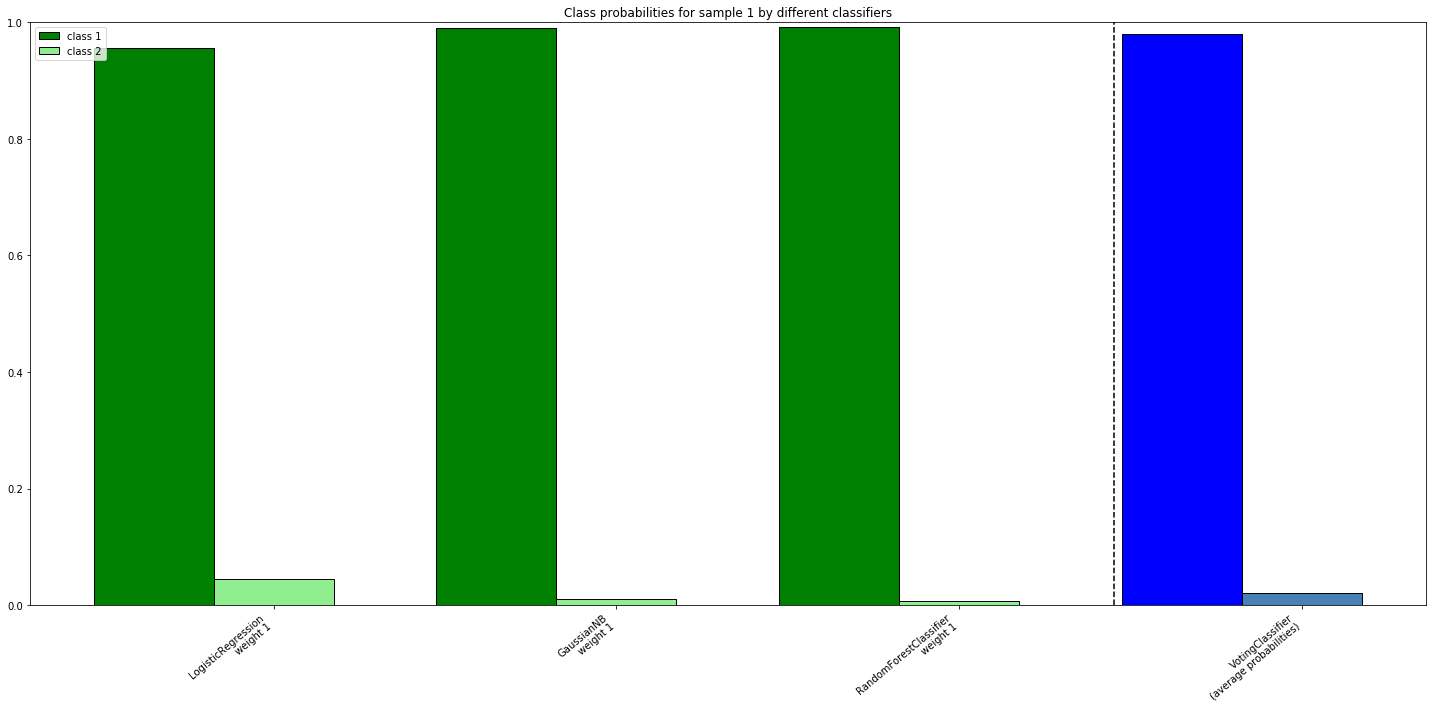

Model VotingClassifier
Accuracy =  0.934

Model LogisticRegression
Accuracy =  0.9339

Model GaussianNB
Accuracy =  0.9336

Model RandomForestClassifier
Accuracy =  0.9365



In [9]:
model = voter("classifier",x_train_c,x_val_c,y_train_c,y_val_c).get_model()

In [11]:
model.predict(x_val_c)

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
model.predict_proba(x_val_c)

array([[0.98485797, 0.01514203],
       [0.9880322 , 0.0119678 ],
       [0.95602673, 0.04397327],
       ...,
       [0.84949234, 0.15050766],
       [0.74813806, 0.25186194],
       [0.93415458, 0.06584542]])

In [13]:
dump(model, 'model_ia.joblib')

['model_ia.joblib']

In [14]:
modelLoad = load('model_ia.joblib')

In [15]:
modelLoad.predict_proba(x_val_c)

array([[0.98485797, 0.01514203],
       [0.9880322 , 0.0119678 ],
       [0.95602673, 0.04397327],
       ...,
       [0.84949234, 0.15050766],
       [0.74813806, 0.25186194],
       [0.93415458, 0.06584542]])

# ------------------------ The End ------------------------------